# Data loading and visualization

In [ ]:
import JupyterNotebooksLib as slicernb
import slicer

# Set viewer size to 50% of screen size
slicernb.AppWindow.setWindowSize(scale=0.5)
# Hide patient information from slice view
slicernb.showSliceViewAnnotations(False)

## 3D volume display

In [ ]:
# Clear scene
slicer.mrmlScene.Clear(False)

# Load a Slicer sample data set
import SampleData
volume = SampleData.SampleDataLogic().downloadMRBrainTumor1()

print("Volume size: {0}".format(volume.GetImageData().GetDimensions()))

In [ ]:
# Show slice view
slicernb.ViewDisplay("OneUpRedSlice")

In [ ]:
# Lightbox view
slicernb.ViewLightboxDisplay("Red", columns=5, rows=3, rangeShrink=[45,50])

In [ ]:
# Enable 3D volume rendering
slicernb.showVolumeRendering(volume)

# Show slice and 3D views
slicernb.AppWindow.setWindowSize(scale=0.7)  # Use a bit larger size, as we'll display 4 views
slicernb.ViewDisplay("FourUp")  # You can also try: FourUp, OneUpRedSlice, OneUp3D

## Dynamic views - Level 1. View objects + standard widgets
- Displayed content is saved in the notebook
- Views cannot be placed in a layout
- Low update rate (only for small adjustment of view parameters)
- Mouse and keyboard events are not captured

In [ ]:
# Slice view display
from ipywidgets import interact
@interact(position=(0,100))
def update(position=50):
    return slicernb.ViewSliceDisplay('Red', positionPercent=position)

In [ ]:
# Enable volume cropping
displayNode = slicer.modules.volumerendering.logic().GetFirstVolumeRenderingDisplayNode(volume)
displayNode.SetCroppingEnabled(True)
slicer.modules.volumerendering.logic().CreateROINode(displayNode)
roiNode = displayNode.GetROINode()

# 3D view display
slicernb.reset3DView()
roiNode.GetDisplayNode().SetVisibility(False)  # hide the ROI box
from ipywidgets import interact
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-180.0,180.0,5), cropx=(0,140,5), cropy=(0,240,5), cropz=(0,160,5))
def update(roll=0, pitch=-10, yaw=30, cropx=140, cropy=240, cropz=160):
    #roiNode.SetRadiusXYZ([cropx, cropy, cropz])
    roiNode.SetSizeWorld([cropx, cropy, cropz])
    return slicernb.View3DDisplay(0, orientation=[roll, pitch, yaw])

## Dynamic views - Level 2. View widgets
- Widgets can be placed in a layout
- Widget state (displayed content) is not saved in the notebook by default
- Low update rate (only for small adjustment of view parameters)
- Mouse and keyboard events are not captured

In [ ]:
# Slice widgets
import JupyterNotebooksLib as slicernb
from ipywidgets import HBox
slicernb.ViewSliceWidget('Red')
display(HBox([slicernb.ViewSliceWidget('Red'), slicernb.ViewSliceWidget('Yellow'), slicernb.ViewSliceWidget('Green')]))

In [ ]:
# 3D widget
display(HBox([slicernb.ViewSliceBaseWidget('Red', width="40%"), slicernb.View3DWidget(0, width="40%")]))

## Dynamic views - Level 3. Interactive view widgets
- Some view controlling mouse and keyboard events are captured
- Only selected view can be displayed and controlled
- Medium update rate (somewhat usable on remote computers)

In [ ]:
# Adjust maximum rate of Slicer's Jupyter kernel consuming Jupyter messages.
# Lower values make the notebook more responsive but too low values may make the Slicer application
# slow to respond.
slicer.modules.jupyterkernel.setPollIntervalSec(0.001)

# 3D view
slicernb.AppWindow.setWindowSize(scale=0.8)
live3d = slicernb.ViewInteractiveWidget('1')
live3d.trackMouseMove = True
display(live3d)

In [ ]:
# Slice view (use arrow keys to move between slices, right-click-and-drag to zoom in/out)
liveRedSlice = slicernb.ViewInteractiveWidget('R')
liveRedSlice.trackMouseMove = True
display(liveRedSlice)

## Interactive views - Level 4. Remote application window view
- High update rate (suitable for working on remote computers)
- All mouse and keyboard events are captured
- Full application window can be displayed and controlled
- Only available if Jupyter desktop server is configured 

In [ ]:
slicernb.showVolumeRendering(volume, show=True)
app = slicernb.AppWindow()
app
# Note: "404 : Not Found" error will be displayed if Jupyter desktop server is not configured.

In [ ]:
# Show full application GUI
app.setContents("full")
slicer.util.selectModule("VolumeRendering")

In [ ]:
# Create link that shows the application GUI in a new browser tab
from ipywidgets import HTML
HTML(f"""<a href="{slicernb.AppWindow.defaultDesktopUrl()}" target="_blank">
<b>Click here</b> to open application window in a new browser tab.</a>""")

## Markups display

In [ ]:
import numpy as np
markupPoints = np.array([
    [ 69.12484176,  -8.73226641,  -2.175     ],
    [ 56.3258959 ,  32.61817407,  -2.175     ],
    [ 46.15237483,  57.88788769,  -2.175     ],
    [ 34.02739799,  74.35843751,  -2.175     ],
    [  3.93193405,  85.64423649,  -2.175     ],
    [-45.51061385,  62.53521954,  -2.175     ],
    [-61.63318381, -10.01634531,  -2.175     ],
    [-51.97287678, -54.02084408,  -2.175     ],
    [-18.1022449 , -87.94210015,  -2.175     ],
    [ 32.95255999, -83.64274816,  -2.175     ],
    [ 58.6231426 , -59.59987177,  -2.175     ],
    [ 67.88479492, -35.27503826,  -2.175     ]])

closedCurve = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLMarkupsClosedCurveNode")
slicer.util.updateMarkupsControlPointsFromArray(closedCurve, markupPoints)

slicernb.displayable(closedCurve)

In [ ]:
closedCurve.SetNthControlPointSelected(3, False)
closedCurve.GetDisplayNode().SetSelectedColor(0,0,1)
closedCurve.GetDisplayNode().SetGlyphScale(5)
closedCurve.GetDisplayNode().UseGlyphScaleOn()
slicer.util.setSliceViewerLayers(fit=True)
slicer.modules.markups.logic().JumpSlicesToNthPointInMarkup(closedCurve.GetID(), 1)
slicernb.AppWindow.setWindowSize(scale=0.5)
slicernb.AppWindow.setContents("viewers")
slicernb.ViewDisplay('OneUpRedSlice', center=False)

# Model display
An experimental approach is used for displaying model nodes. They are rendered outside the views in the layout, therefore only this node is visible.

In [ ]:
# Simple static display

modelNode=slicer.modules.models.logic().AddModel(slicernb.localPath("data/ProstateMeanShape.stl"))
slicernb.displayable(modelNode)

In [ ]:
# Interactive view rotation

from ipywidgets import interact
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-90.0,90.0,5))
def update(roll=0, pitch=0, yaw=0):
    return slicernb.ModelDisplay(modelNode, orientation=[roll, pitch, yaw], imageSize=[200,200])

# Plotting using matplotlib

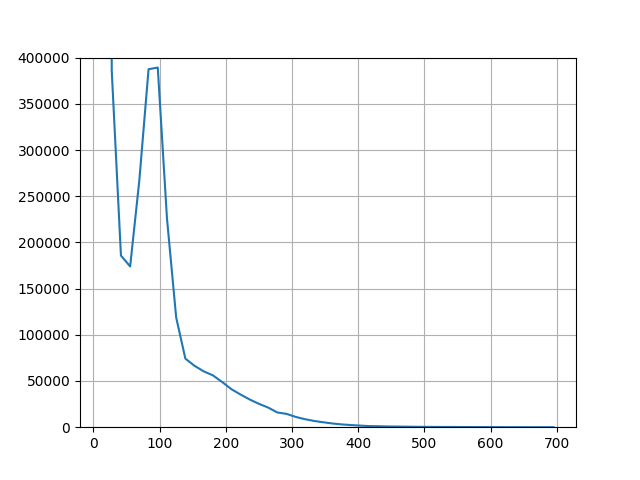

In [19]:
try:
  import matplotlib
except ModuleNotFoundError:
  slicer.util.pip_install('matplotlib')
  import matplotlib

matplotlib.use('Agg')

# Get a volume from SampleData and compute its histogram
import numpy as np
histogram = np.histogram(slicer.util.arrayFromVolume(volume), bins=50)

# Show a plot using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(histogram[1][1:], histogram[0].astype(float))
ax.grid(True)
ax.set_ylim((0, 4e5))

slicernb.MatplotlibDisplay(plt)

#### Run this example in your browser using Binder: [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/slicer/SlicerNotebooks/master?filepath=01_Data_loading_and_display.ipynb)